# FLIGHT PASSENGERS PREDICTIVE ANALYSIS FOR THE NEXT MONTH

In [1]:
import seaborn as sns
df = sns.load_dataset("flights")
df.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [2]:
type(df)

pandas.core.frame.DataFrame

In [3]:
df.shape

(144, 3)

In [4]:
df.columns

Index(['year', 'month', 'passengers'], dtype='object')

In [5]:
df1=df['passengers']

In [6]:
df1

0      112
1      118
2      132
3      129
4      121
      ... 
139    606
140    508
141    461
142    390
143    432
Name: passengers, Length: 144, dtype: int64

Plot the passengers data 

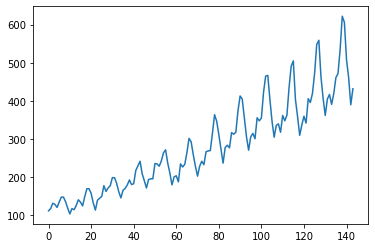

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(df1)

In [8]:
df1[:2]

0    112
1    118
Name: passengers, dtype: int64

Normalize the data

In [9]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [10]:
df1[:2]

array([[0.01544402],
       [0.02702703]])

Lets split the data into training data and test data

Lets consider first 65 percent of the data as training samples

Remaining 35 percent of the data as test samples

In [11]:
train_size=int(len(df1)*0.65)
test_size=len(df1)-train_size
print("train size :" + str(train_size))
print("test size :" + str(test_size))

train size :93
test size :51


In [12]:
train_data=df1[0:train_size]
train_data.shape

(93, 1)

In [13]:
test_data=df1[train_size:len(df1)]
test_data.shape

(51, 1)

In [14]:
train_data[:5]

array([[0.01544402],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853]])

Lets create training and test datasets from time series data

In [15]:
## Function to create training and test data from time series data given the time_stamp size
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [16]:
time_step = 10
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [17]:
print(X_train.shape), print(y_train.shape)

(82, 10)
(82,)


(None, None)

In [18]:
print(X_test.shape), print(y_test.shape)

(40, 10)
(40,)


(None, None)

In [19]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
print(X_train.shape),print(X_test.shape)

(82, 10, 1)
(40, 10, 1)


(None, None)

In [20]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [21]:
model=Sequential()
model.add(LSTM(15,return_sequences=True,input_shape=(10,1)))
model.add(LSTM(15,return_sequences=True))
model.add(LSTM(10,return_sequences=True))
model.add(LSTM(10))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 10, 15)            1020      
_________________________________________________________________
lstm_1 (LSTM)                (None, 10, 15)            1860      
_________________________________________________________________
lstm_2 (LSTM)                (None, 10, 10)            1040      
_________________________________________________________________
lstm_3 (LSTM)                (None, 10)                840       
_________________________________________________________________
dense (Dense)                (None, 1)                 11        
Total params: 4,771
Trainable params: 4,771
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=2000,batch_size=5,verbose=1)

Epoch 1/2000
17/17 [==============================] - 1s 80ms/step - loss: 0.0362 - val_loss: 0.1413
Epoch 2/2000
17/17 [==============================] - 0s 9ms/step - loss: 0.0176 - val_loss: 0.1242
Epoch 3/2000
17/17 [==============================] - 0s 9ms/step - loss: 0.0139 - val_loss: 0.1048
Epoch 4/2000
17/17 [==============================] - 0s 10ms/step - loss: 0.0114 - val_loss: 0.0686
Epoch 5/2000
17/17 [==============================] - 0s 10ms/step - loss: 0.0098 - val_loss: 0.0487
Epoch 6/2000
17/17 [==============================] - 0s 12ms/step - loss: 0.0076 - val_loss: 0.0293
Epoch 7/2000
17/17 [==============================] - 0s 10ms/step - loss: 0.0060 - val_loss: 0.0373
Epoch 8/2000
17/17 [==============================] - 0s 10ms/step - loss: 0.0062 - val_loss: 0.0314
Epoch 9/2000
17/17 [==============================] - 0s 9ms/step - loss: 0.0059 - val_loss: 0.0293
Epoch 10/2000
17/17 [==============================] - 0s 10ms/step - loss: 0.0070 - val_loss:

17/17 [==============================] - 0s 8ms/step - loss: 0.0056 - val_loss: 0.0260
Epoch 83/2000
17/17 [==============================] - 0s 8ms/step - loss: 0.0056 - val_loss: 0.0274
Epoch 84/2000
17/17 [==============================] - 0s 9ms/step - loss: 0.0058 - val_loss: 0.0306
Epoch 85/2000
17/17 [==============================] - 0s 8ms/step - loss: 0.0057 - val_loss: 0.0261
Epoch 86/2000
17/17 [==============================] - 0s 9ms/step - loss: 0.0057 - val_loss: 0.0258
Epoch 87/2000
17/17 [==============================] - 0s 8ms/step - loss: 0.0056 - val_loss: 0.0295
Epoch 88/2000
17/17 [==============================] - 0s 8ms/step - loss: 0.0060 - val_loss: 0.0284
Epoch 89/2000
17/17 [==============================] - 0s 8ms/step - loss: 0.0058 - val_loss: 0.0262
Epoch 90/2000
17/17 [==============================] - 0s 9ms/step - loss: 0.0057 - val_loss: 0.0314
Epoch 91/2000
17/17 [==============================] - 0s 8ms/step - loss: 0.0063 - val_loss: 0.0263
Epoc

17/17 [==============================] - 0s 8ms/step - loss: 0.0016 - val_loss: 0.0075
Epoch 163/2000
17/17 [==============================] - 0s 8ms/step - loss: 0.0016 - val_loss: 0.0074
Epoch 164/2000
17/17 [==============================] - 0s 8ms/step - loss: 0.0015 - val_loss: 0.0061
Epoch 165/2000
17/17 [==============================] - 0s 8ms/step - loss: 0.0015 - val_loss: 0.0086
Epoch 166/2000
17/17 [==============================] - 0s 8ms/step - loss: 0.0014 - val_loss: 0.0061
Epoch 167/2000
17/17 [==============================] - 0s 8ms/step - loss: 0.0020 - val_loss: 0.0066
Epoch 168/2000
17/17 [==============================] - 0s 8ms/step - loss: 0.0021 - val_loss: 0.0067
Epoch 169/2000
17/17 [==============================] - 0s 8ms/step - loss: 0.0022 - val_loss: 0.0069
Epoch 170/2000
17/17 [==============================] - 0s 8ms/step - loss: 0.0016 - val_loss: 0.0078
Epoch 171/2000
17/17 [==============================] - 0s 8ms/step - loss: 0.0015 - val_loss: 0.

17/17 [==============================] - 0s 9ms/step - loss: 0.0012 - val_loss: 0.0135
Epoch 243/2000
17/17 [==============================] - 0s 8ms/step - loss: 0.0011 - val_loss: 0.0129
Epoch 244/2000
17/17 [==============================] - 0s 8ms/step - loss: 9.5665e-04 - val_loss: 0.0135
Epoch 245/2000
17/17 [==============================] - 0s 8ms/step - loss: 0.0010 - val_loss: 0.0126
Epoch 246/2000
17/17 [==============================] - 0s 8ms/step - loss: 9.8971e-04 - val_loss: 0.0126
Epoch 247/2000
17/17 [==============================] - 0s 8ms/step - loss: 0.0011 - val_loss: 0.0129
Epoch 248/2000
17/17 [==============================] - 0s 8ms/step - loss: 0.0011 - val_loss: 0.0123
Epoch 249/2000
17/17 [==============================] - 0s 9ms/step - loss: 0.0011 - val_loss: 0.0121
Epoch 250/2000
17/17 [==============================] - 0s 10ms/step - loss: 9.4281e-04 - val_loss: 0.0121
Epoch 251/2000
17/17 [==============================] - 0s 8ms/step - loss: 9.1304e-

17/17 [==============================] - 0s 8ms/step - loss: 8.3395e-04 - val_loss: 0.0071
Epoch 320/2000
17/17 [==============================] - 0s 8ms/step - loss: 7.2604e-04 - val_loss: 0.0066
Epoch 321/2000
17/17 [==============================] - 0s 8ms/step - loss: 6.6170e-04 - val_loss: 0.0066
Epoch 322/2000
17/17 [==============================] - 0s 8ms/step - loss: 6.9007e-04 - val_loss: 0.0065
Epoch 323/2000
17/17 [==============================] - 0s 8ms/step - loss: 6.5947e-04 - val_loss: 0.0072
Epoch 324/2000
17/17 [==============================] - 0s 9ms/step - loss: 9.1275e-04 - val_loss: 0.0065
Epoch 325/2000
17/17 [==============================] - 0s 9ms/step - loss: 7.2550e-04 - val_loss: 0.0071
Epoch 326/2000
17/17 [==============================] - 0s 8ms/step - loss: 6.9449e-04 - val_loss: 0.0070
Epoch 327/2000
17/17 [==============================] - 0s 8ms/step - loss: 6.6757e-04 - val_loss: 0.0079
Epoch 328/2000
17/17 [==============================] - 0s 8m

17/17 [==============================] - 0s 8ms/step - loss: 7.4261e-04 - val_loss: 0.0067
Epoch 397/2000
17/17 [==============================] - 0s 10ms/step - loss: 6.1175e-04 - val_loss: 0.0071
Epoch 398/2000
17/17 [==============================] - 0s 9ms/step - loss: 6.3280e-04 - val_loss: 0.0079
Epoch 399/2000
17/17 [==============================] - 0s 9ms/step - loss: 7.3787e-04 - val_loss: 0.0069
Epoch 400/2000
17/17 [==============================] - 0s 9ms/step - loss: 5.6274e-04 - val_loss: 0.0077
Epoch 401/2000
17/17 [==============================] - 0s 9ms/step - loss: 6.0944e-04 - val_loss: 0.0077
Epoch 402/2000
17/17 [==============================] - 0s 9ms/step - loss: 5.6050e-04 - val_loss: 0.0065
Epoch 403/2000
17/17 [==============================] - 0s 8ms/step - loss: 6.3066e-04 - val_loss: 0.0059
Epoch 404/2000
17/17 [==============================] - 0s 8ms/step - loss: 5.8827e-04 - val_loss: 0.0061
Epoch 405/2000
17/17 [==============================] - 0s 8

17/17 [==============================] - 0s 8ms/step - loss: 5.3390e-04 - val_loss: 0.0043
Epoch 474/2000
17/17 [==============================] - 0s 9ms/step - loss: 4.9969e-04 - val_loss: 0.0040
Epoch 475/2000
17/17 [==============================] - 0s 8ms/step - loss: 5.1843e-04 - val_loss: 0.0049
Epoch 476/2000
17/17 [==============================] - 0s 8ms/step - loss: 5.4198e-04 - val_loss: 0.0049
Epoch 477/2000
17/17 [==============================] - 0s 8ms/step - loss: 6.2967e-04 - val_loss: 0.0040
Epoch 478/2000
17/17 [==============================] - 0s 8ms/step - loss: 5.7307e-04 - val_loss: 0.0042
Epoch 479/2000
17/17 [==============================] - 0s 8ms/step - loss: 4.9880e-04 - val_loss: 0.0044
Epoch 480/2000
17/17 [==============================] - 0s 8ms/step - loss: 6.8615e-04 - val_loss: 0.0063
Epoch 481/2000
17/17 [==============================] - 0s 8ms/step - loss: 6.4101e-04 - val_loss: 0.0057
Epoch 482/2000
17/17 [==============================] - 0s 9m

17/17 [==============================] - 0s 10ms/step - loss: 5.1199e-04 - val_loss: 0.0045
Epoch 551/2000
17/17 [==============================] - 0s 9ms/step - loss: 4.5641e-04 - val_loss: 0.0045
Epoch 552/2000
17/17 [==============================] - 0s 9ms/step - loss: 5.1382e-04 - val_loss: 0.0047
Epoch 553/2000
17/17 [==============================] - 0s 8ms/step - loss: 4.4008e-04 - val_loss: 0.0045
Epoch 554/2000
17/17 [==============================] - 0s 8ms/step - loss: 4.0112e-04 - val_loss: 0.0048
Epoch 555/2000
17/17 [==============================] - 0s 8ms/step - loss: 4.6031e-04 - val_loss: 0.0043
Epoch 556/2000
17/17 [==============================] - 0s 8ms/step - loss: 4.5687e-04 - val_loss: 0.0047
Epoch 557/2000
17/17 [==============================] - 0s 8ms/step - loss: 4.6428e-04 - val_loss: 0.0046
Epoch 558/2000
17/17 [==============================] - 0s 8ms/step - loss: 4.4568e-04 - val_loss: 0.0045
Epoch 559/2000
17/17 [==============================] - 0s 9

17/17 [==============================] - 0s 8ms/step - loss: 4.0447e-04 - val_loss: 0.0052
Epoch 628/2000
17/17 [==============================] - 0s 8ms/step - loss: 4.1447e-04 - val_loss: 0.0059
Epoch 629/2000
17/17 [==============================] - 0s 9ms/step - loss: 4.0723e-04 - val_loss: 0.0038
Epoch 630/2000
17/17 [==============================] - 0s 8ms/step - loss: 3.9263e-04 - val_loss: 0.0047
Epoch 631/2000
17/17 [==============================] - 0s 8ms/step - loss: 3.8554e-04 - val_loss: 0.0047
Epoch 632/2000
17/17 [==============================] - 0s 8ms/step - loss: 5.2663e-04 - val_loss: 0.0064
Epoch 633/2000
17/17 [==============================] - 0s 8ms/step - loss: 5.3427e-04 - val_loss: 0.0056
Epoch 634/2000
17/17 [==============================] - 0s 8ms/step - loss: 5.8492e-04 - val_loss: 0.0049
Epoch 635/2000
17/17 [==============================] - 0s 8ms/step - loss: 5.5265e-04 - val_loss: 0.0053
Epoch 636/2000
17/17 [==============================] - 0s 8m

17/17 [==============================] - 0s 9ms/step - loss: 3.3420e-04 - val_loss: 0.0041
Epoch 705/2000
17/17 [==============================] - 0s 9ms/step - loss: 3.7771e-04 - val_loss: 0.0049
Epoch 706/2000
17/17 [==============================] - 0s 9ms/step - loss: 4.4304e-04 - val_loss: 0.0039
Epoch 707/2000
17/17 [==============================] - 0s 8ms/step - loss: 3.8267e-04 - val_loss: 0.0055
Epoch 708/2000
17/17 [==============================] - 0s 9ms/step - loss: 4.1249e-04 - val_loss: 0.0062
Epoch 709/2000
17/17 [==============================] - 0s 9ms/step - loss: 4.2874e-04 - val_loss: 0.0072
Epoch 710/2000
17/17 [==============================] - 0s 8ms/step - loss: 4.2676e-04 - val_loss: 0.0051
Epoch 711/2000
17/17 [==============================] - 0s 8ms/step - loss: 3.6113e-04 - val_loss: 0.0055
Epoch 712/2000
17/17 [==============================] - 0s 8ms/step - loss: 3.8367e-04 - val_loss: 0.0047
Epoch 713/2000
17/17 [==============================] - 0s 8m

17/17 [==============================] - 0s 8ms/step - loss: 3.2669e-04 - val_loss: 0.0072
Epoch 782/2000
17/17 [==============================] - 0s 8ms/step - loss: 3.4392e-04 - val_loss: 0.0069
Epoch 783/2000
17/17 [==============================] - 0s 8ms/step - loss: 2.9824e-04 - val_loss: 0.0071
Epoch 784/2000
17/17 [==============================] - 0s 10ms/step - loss: 3.0065e-04 - val_loss: 0.0059
Epoch 785/2000
17/17 [==============================] - 0s 8ms/step - loss: 2.8209e-04 - val_loss: 0.0074
Epoch 786/2000
17/17 [==============================] - 0s 9ms/step - loss: 4.2071e-04 - val_loss: 0.0071
Epoch 787/2000
17/17 [==============================] - 0s 8ms/step - loss: 3.6625e-04 - val_loss: 0.0093
Epoch 788/2000
17/17 [==============================] - 0s 8ms/step - loss: 3.7266e-04 - val_loss: 0.0060
Epoch 789/2000
17/17 [==============================] - 0s 8ms/step - loss: 3.4710e-04 - val_loss: 0.0053
Epoch 790/2000
17/17 [==============================] - 0s 8

17/17 [==============================] - 0s 8ms/step - loss: 4.9893e-04 - val_loss: 0.0111
Epoch 859/2000
17/17 [==============================] - 0s 8ms/step - loss: 3.7594e-04 - val_loss: 0.0062
Epoch 860/2000
17/17 [==============================] - 0s 9ms/step - loss: 3.3469e-04 - val_loss: 0.0079
Epoch 861/2000
17/17 [==============================] - 0s 8ms/step - loss: 3.2706e-04 - val_loss: 0.0091
Epoch 862/2000
17/17 [==============================] - 0s 9ms/step - loss: 3.5317e-04 - val_loss: 0.0086
Epoch 863/2000
17/17 [==============================] - 0s 9ms/step - loss: 3.6798e-04 - val_loss: 0.0091
Epoch 864/2000
17/17 [==============================] - 0s 9ms/step - loss: 3.2996e-04 - val_loss: 0.0084
Epoch 865/2000
17/17 [==============================] - 0s 9ms/step - loss: 2.7271e-04 - val_loss: 0.0078
Epoch 866/2000
17/17 [==============================] - 0s 8ms/step - loss: 2.7636e-04 - val_loss: 0.0075
Epoch 867/2000
17/17 [==============================] - 0s 8m

17/17 [==============================] - 0s 8ms/step - loss: 2.0579e-04 - val_loss: 0.0088
Epoch 936/2000
17/17 [==============================] - 0s 8ms/step - loss: 2.0464e-04 - val_loss: 0.0090
Epoch 937/2000
17/17 [==============================] - 0s 8ms/step - loss: 2.4367e-04 - val_loss: 0.0092
Epoch 938/2000
17/17 [==============================] - 0s 8ms/step - loss: 1.9652e-04 - val_loss: 0.0070
Epoch 939/2000
17/17 [==============================] - 0s 8ms/step - loss: 2.6679e-04 - val_loss: 0.0088
Epoch 940/2000
17/17 [==============================] - 0s 8ms/step - loss: 2.3616e-04 - val_loss: 0.0078
Epoch 941/2000
17/17 [==============================] - 0s 8ms/step - loss: 2.0761e-04 - val_loss: 0.0086
Epoch 942/2000
17/17 [==============================] - 0s 8ms/step - loss: 2.4606e-04 - val_loss: 0.0098
Epoch 943/2000
17/17 [==============================] - 0s 9ms/step - loss: 2.3642e-04 - val_loss: 0.0090
Epoch 944/2000
17/17 [==============================] - 0s 9m

17/17 [==============================] - 0s 9ms/step - loss: 2.7229e-04 - val_loss: 0.0098
Epoch 1013/2000
17/17 [==============================] - 0s 8ms/step - loss: 1.9238e-04 - val_loss: 0.0101
Epoch 1014/2000
17/17 [==============================] - 0s 9ms/step - loss: 1.8005e-04 - val_loss: 0.0093
Epoch 1015/2000
17/17 [==============================] - 0s 9ms/step - loss: 2.5013e-04 - val_loss: 0.0093
Epoch 1016/2000
17/17 [==============================] - 0s 9ms/step - loss: 2.5579e-04 - val_loss: 0.0118
Epoch 1017/2000
17/17 [==============================] - 0s 9ms/step - loss: 1.8929e-04 - val_loss: 0.0102
Epoch 1018/2000
17/17 [==============================] - 0s 8ms/step - loss: 2.1454e-04 - val_loss: 0.0108
Epoch 1019/2000
17/17 [==============================] - 0s 10ms/step - loss: 1.7352e-04 - val_loss: 0.0101
Epoch 1020/2000
17/17 [==============================] - 0s 10ms/step - loss: 1.7024e-04 - val_loss: 0.0095
Epoch 1021/2000
17/17 [============================

17/17 [==============================] - 0s 8ms/step - loss: 1.6889e-04 - val_loss: 0.0107
Epoch 1089/2000
17/17 [==============================] - 0s 8ms/step - loss: 1.9275e-04 - val_loss: 0.0126
Epoch 1090/2000
17/17 [==============================] - 0s 8ms/step - loss: 2.1347e-04 - val_loss: 0.0125
Epoch 1091/2000
17/17 [==============================] - 0s 8ms/step - loss: 2.1789e-04 - val_loss: 0.0106
Epoch 1092/2000
17/17 [==============================] - 0s 8ms/step - loss: 1.9121e-04 - val_loss: 0.0121
Epoch 1093/2000
17/17 [==============================] - 0s 8ms/step - loss: 1.8884e-04 - val_loss: 0.0128
Epoch 1094/2000
17/17 [==============================] - 0s 8ms/step - loss: 1.9493e-04 - val_loss: 0.0114
Epoch 1095/2000
17/17 [==============================] - 0s 8ms/step - loss: 1.8282e-04 - val_loss: 0.0144
Epoch 1096/2000
17/17 [==============================] - 0s 8ms/step - loss: 1.7546e-04 - val_loss: 0.0115
Epoch 1097/2000
17/17 [==============================

17/17 [==============================] - 0s 8ms/step - loss: 1.9204e-04 - val_loss: 0.0163
Epoch 1165/2000
17/17 [==============================] - 0s 9ms/step - loss: 2.2522e-04 - val_loss: 0.0153
Epoch 1166/2000
17/17 [==============================] - 0s 9ms/step - loss: 1.5624e-04 - val_loss: 0.0161
Epoch 1167/2000
17/17 [==============================] - 0s 8ms/step - loss: 1.2643e-04 - val_loss: 0.0152
Epoch 1168/2000
17/17 [==============================] - 0s 8ms/step - loss: 1.3096e-04 - val_loss: 0.0155
Epoch 1169/2000
17/17 [==============================] - 0s 8ms/step - loss: 1.3398e-04 - val_loss: 0.0165
Epoch 1170/2000
17/17 [==============================] - 0s 8ms/step - loss: 1.2134e-04 - val_loss: 0.0167
Epoch 1171/2000
17/17 [==============================] - 0s 8ms/step - loss: 1.2737e-04 - val_loss: 0.0155
Epoch 1172/2000
17/17 [==============================] - 0s 8ms/step - loss: 1.2522e-04 - val_loss: 0.0154
Epoch 1173/2000
17/17 [==============================

17/17 [==============================] - 0s 8ms/step - loss: 1.5080e-04 - val_loss: 0.0182
Epoch 1241/2000
17/17 [==============================] - 0s 9ms/step - loss: 1.1879e-04 - val_loss: 0.0195
Epoch 1242/2000
17/17 [==============================] - 0s 8ms/step - loss: 1.0940e-04 - val_loss: 0.0194
Epoch 1243/2000
17/17 [==============================] - 0s 8ms/step - loss: 1.4723e-04 - val_loss: 0.0172
Epoch 1244/2000
17/17 [==============================] - 0s 8ms/step - loss: 1.2588e-04 - val_loss: 0.0187
Epoch 1245/2000
17/17 [==============================] - 0s 8ms/step - loss: 1.0467e-04 - val_loss: 0.0179
Epoch 1246/2000
17/17 [==============================] - 0s 8ms/step - loss: 1.3102e-04 - val_loss: 0.0195
Epoch 1247/2000
17/17 [==============================] - 0s 8ms/step - loss: 1.1130e-04 - val_loss: 0.0172
Epoch 1248/2000
17/17 [==============================] - 0s 8ms/step - loss: 9.9680e-05 - val_loss: 0.0180
Epoch 1249/2000
17/17 [==============================

17/17 [==============================] - 0s 8ms/step - loss: 1.3352e-04 - val_loss: 0.0204
Epoch 1317/2000
17/17 [==============================] - 0s 8ms/step - loss: 1.6065e-04 - val_loss: 0.0223
Epoch 1318/2000
17/17 [==============================] - 0s 8ms/step - loss: 1.2257e-04 - val_loss: 0.0221
Epoch 1319/2000
17/17 [==============================] - 0s 8ms/step - loss: 8.0959e-05 - val_loss: 0.0203
Epoch 1320/2000
17/17 [==============================] - 0s 8ms/step - loss: 1.2103e-04 - val_loss: 0.0213
Epoch 1321/2000
17/17 [==============================] - 0s 8ms/step - loss: 1.7755e-04 - val_loss: 0.0193
Epoch 1322/2000
17/17 [==============================] - 0s 8ms/step - loss: 1.8179e-04 - val_loss: 0.0230
Epoch 1323/2000
17/17 [==============================] - 0s 9ms/step - loss: 2.0243e-04 - val_loss: 0.0230
Epoch 1324/2000
17/17 [==============================] - 0s 9ms/step - loss: 1.7970e-04 - val_loss: 0.0175
Epoch 1325/2000
17/17 [==============================

17/17 [==============================] - 0s 8ms/step - loss: 5.7701e-05 - val_loss: 0.0197
Epoch 1393/2000
17/17 [==============================] - 0s 8ms/step - loss: 5.9317e-05 - val_loss: 0.0190
Epoch 1394/2000
17/17 [==============================] - 0s 9ms/step - loss: 4.8677e-05 - val_loss: 0.0206
Epoch 1395/2000
17/17 [==============================] - 0s 10ms/step - loss: 4.8114e-05 - val_loss: 0.0177
Epoch 1396/2000
17/17 [==============================] - 0s 8ms/step - loss: 4.9422e-05 - val_loss: 0.0195
Epoch 1397/2000
17/17 [==============================] - 0s 8ms/step - loss: 5.7985e-05 - val_loss: 0.0199
Epoch 1398/2000
17/17 [==============================] - 0s 8ms/step - loss: 7.5769e-05 - val_loss: 0.0191
Epoch 1399/2000
17/17 [==============================] - 0s 8ms/step - loss: 6.0821e-05 - val_loss: 0.0216
Epoch 1400/2000
17/17 [==============================] - 0s 8ms/step - loss: 6.5514e-05 - val_loss: 0.0214
Epoch 1401/2000
17/17 [=============================

17/17 [==============================] - 0s 8ms/step - loss: 8.0009e-05 - val_loss: 0.0189
Epoch 1469/2000
17/17 [==============================] - 0s 8ms/step - loss: 5.7987e-05 - val_loss: 0.0204
Epoch 1470/2000
17/17 [==============================] - 0s 8ms/step - loss: 5.6833e-05 - val_loss: 0.0208
Epoch 1471/2000
17/17 [==============================] - 0s 8ms/step - loss: 4.9863e-05 - val_loss: 0.0192
Epoch 1472/2000
17/17 [==============================] - 0s 8ms/step - loss: 4.0294e-05 - val_loss: 0.0187
Epoch 1473/2000
17/17 [==============================] - 0s 8ms/step - loss: 3.7692e-05 - val_loss: 0.0211
Epoch 1474/2000
17/17 [==============================] - 0s 8ms/step - loss: 4.9828e-05 - val_loss: 0.0217
Epoch 1475/2000
17/17 [==============================] - 0s 8ms/step - loss: 7.2385e-05 - val_loss: 0.0206
Epoch 1476/2000
17/17 [==============================] - 0s 8ms/step - loss: 5.5807e-05 - val_loss: 0.0217
Epoch 1477/2000
17/17 [==============================

17/17 [==============================] - 0s 8ms/step - loss: 4.4044e-05 - val_loss: 0.0204
Epoch 1545/2000
17/17 [==============================] - 0s 8ms/step - loss: 4.2324e-05 - val_loss: 0.0202
Epoch 1546/2000
17/17 [==============================] - 0s 8ms/step - loss: 4.6871e-05 - val_loss: 0.0211
Epoch 1547/2000
17/17 [==============================] - 0s 8ms/step - loss: 3.4987e-05 - val_loss: 0.0214
Epoch 1548/2000
17/17 [==============================] - 0s 8ms/step - loss: 4.2836e-05 - val_loss: 0.0200
Epoch 1549/2000
17/17 [==============================] - 0s 8ms/step - loss: 4.6068e-05 - val_loss: 0.0213
Epoch 1550/2000
17/17 [==============================] - 0s 8ms/step - loss: 3.0297e-05 - val_loss: 0.0211
Epoch 1551/2000
17/17 [==============================] - 0s 8ms/step - loss: 3.8181e-05 - val_loss: 0.0202
Epoch 1552/2000
17/17 [==============================] - 0s 8ms/step - loss: 6.3699e-05 - val_loss: 0.0186
Epoch 1553/2000
17/17 [==============================

17/17 [==============================] - 0s 8ms/step - loss: 1.9243e-05 - val_loss: 0.0211
Epoch 1621/2000
17/17 [==============================] - 0s 8ms/step - loss: 1.8281e-05 - val_loss: 0.0219
Epoch 1622/2000
17/17 [==============================] - 0s 8ms/step - loss: 1.9838e-05 - val_loss: 0.0215
Epoch 1623/2000
17/17 [==============================] - 0s 8ms/step - loss: 1.9841e-05 - val_loss: 0.0201
Epoch 1624/2000
17/17 [==============================] - 0s 8ms/step - loss: 2.2988e-05 - val_loss: 0.0212
Epoch 1625/2000
17/17 [==============================] - 0s 8ms/step - loss: 1.6313e-05 - val_loss: 0.0216
Epoch 1626/2000
17/17 [==============================] - 0s 8ms/step - loss: 2.4571e-05 - val_loss: 0.0217
Epoch 1627/2000
17/17 [==============================] - 0s 8ms/step - loss: 2.6880e-05 - val_loss: 0.0211
Epoch 1628/2000
17/17 [==============================] - 0s 8ms/step - loss: 3.0868e-05 - val_loss: 0.0213
Epoch 1629/2000
17/17 [==============================

17/17 [==============================] - 0s 8ms/step - loss: 1.5708e-05 - val_loss: 0.0219
Epoch 1697/2000
17/17 [==============================] - 0s 8ms/step - loss: 1.7994e-05 - val_loss: 0.0214
Epoch 1698/2000
17/17 [==============================] - 0s 8ms/step - loss: 2.3329e-05 - val_loss: 0.0225
Epoch 1699/2000
17/17 [==============================] - 0s 8ms/step - loss: 3.1861e-05 - val_loss: 0.0211
Epoch 1700/2000
17/17 [==============================] - 0s 8ms/step - loss: 2.2788e-05 - val_loss: 0.0220
Epoch 1701/2000
17/17 [==============================] - 0s 9ms/step - loss: 1.9035e-05 - val_loss: 0.0216
Epoch 1702/2000
17/17 [==============================] - 0s 8ms/step - loss: 1.9066e-05 - val_loss: 0.0224
Epoch 1703/2000
17/17 [==============================] - 0s 10ms/step - loss: 1.5508e-05 - val_loss: 0.0226
Epoch 1704/2000
17/17 [==============================] - 0s 8ms/step - loss: 1.3314e-05 - val_loss: 0.0224
Epoch 1705/2000
17/17 [=============================

17/17 [==============================] - 0s 10ms/step - loss: 1.9888e-05 - val_loss: 0.0223
Epoch 1773/2000
17/17 [==============================] - 0s 8ms/step - loss: 1.6027e-05 - val_loss: 0.0223
Epoch 1774/2000
17/17 [==============================] - 0s 8ms/step - loss: 1.8356e-05 - val_loss: 0.0227
Epoch 1775/2000
17/17 [==============================] - 0s 8ms/step - loss: 1.9484e-05 - val_loss: 0.0221
Epoch 1776/2000
17/17 [==============================] - 0s 8ms/step - loss: 1.5872e-05 - val_loss: 0.0230
Epoch 1777/2000
17/17 [==============================] - 0s 9ms/step - loss: 2.0047e-05 - val_loss: 0.0230
Epoch 1778/2000
17/17 [==============================] - 0s 8ms/step - loss: 2.0751e-05 - val_loss: 0.0229
Epoch 1779/2000
17/17 [==============================] - 0s 8ms/step - loss: 2.0086e-05 - val_loss: 0.0223
Epoch 1780/2000
17/17 [==============================] - 0s 8ms/step - loss: 1.2686e-05 - val_loss: 0.0231
Epoch 1781/2000
17/17 [=============================

17/17 [==============================] - 0s 8ms/step - loss: 1.7192e-05 - val_loss: 0.0213
Epoch 1849/2000
17/17 [==============================] - 0s 9ms/step - loss: 1.6436e-05 - val_loss: 0.0229
Epoch 1850/2000
17/17 [==============================] - 0s 8ms/step - loss: 1.3704e-05 - val_loss: 0.0222
Epoch 1851/2000
17/17 [==============================] - 0s 9ms/step - loss: 2.1006e-05 - val_loss: 0.0226
Epoch 1852/2000
17/17 [==============================] - 0s 8ms/step - loss: 1.4106e-05 - val_loss: 0.0220
Epoch 1853/2000
17/17 [==============================] - 0s 8ms/step - loss: 2.1760e-05 - val_loss: 0.0225
Epoch 1854/2000
17/17 [==============================] - ETA: 0s - loss: 2.1459e-0 - 0s 9ms/step - loss: 2.2615e-05 - val_loss: 0.0221
Epoch 1855/2000
17/17 [==============================] - 0s 8ms/step - loss: 3.3520e-05 - val_loss: 0.0212
Epoch 1856/2000
17/17 [==============================] - 0s 8ms/step - loss: 3.0039e-05 - val_loss: 0.0224
Epoch 1857/2000
17/17 [==

17/17 [==============================] - 0s 8ms/step - loss: 2.0159e-05 - val_loss: 0.0214
Epoch 1925/2000
17/17 [==============================] - 0s 8ms/step - loss: 2.3722e-05 - val_loss: 0.0224
Epoch 1926/2000
17/17 [==============================] - 0s 8ms/step - loss: 2.2359e-05 - val_loss: 0.0216
Epoch 1927/2000
17/17 [==============================] - 0s 8ms/step - loss: 2.0933e-05 - val_loss: 0.0227
Epoch 1928/2000
17/17 [==============================] - 0s 8ms/step - loss: 1.0858e-05 - val_loss: 0.0234
Epoch 1929/2000
17/17 [==============================] - 0s 8ms/step - loss: 1.3311e-05 - val_loss: 0.0221
Epoch 1930/2000
17/17 [==============================] - 0s 8ms/step - loss: 1.6362e-05 - val_loss: 0.0225
Epoch 1931/2000
17/17 [==============================] - 0s 8ms/step - loss: 7.5726e-06 - val_loss: 0.0225
Epoch 1932/2000
17/17 [==============================] - 0s 8ms/step - loss: 1.1203e-05 - val_loss: 0.0226
Epoch 1933/2000
17/17 [==============================

17/17 [==============================] - 0s 8ms/step - loss: 4.6709e-05 - val_loss: 0.0220


In [26]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [27]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [28]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

230.0107381542749

In [29]:
### Test Data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

369.1429691926878

Next month number of passengers prediction

In [30]:
X_test.shape

(40, 10, 1)

In [31]:
model.predict(X_test)

array([[0.591103  ],
       [0.53662634],
       [0.42495158],
       [0.30292973],
       [0.38380766],
       [0.44856083],
       [0.43108118],
       [0.45411164],
       [0.501108  ],
       [0.43889454],
       [0.6105422 ],
       [0.6422842 ],
       [0.6096179 ],
       [0.5485466 ],
       [0.41054693],
       [0.3145541 ],
       [0.38213256],
       [0.45313025],
       [0.47030887],
       [0.47718105],
       [0.63421303],
       [0.51217896],
       [0.6214677 ],
       [0.58170587],
       [0.5968978 ],
       [0.55340344],
       [0.47681123],
       [0.36839125],
       [0.4058365 ],
       [0.5924453 ],
       [0.57070607],
       [0.5237691 ],
       [0.5626609 ],
       [0.60959965],
       [0.57100254],
       [0.57951295],
       [0.58091396],
       [0.5619962 ],
       [0.5074912 ],
       [0.45597306]], dtype=float32)

In [32]:
### Plotting 
# shift train predictions for plotting
look_back=10
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

In [33]:
trainPredictPlot

array([[         nan],
       [         nan],
       [         nan],
       [         nan],
       [         nan],
       [         nan],
       [         nan],
       [         nan],
       [         nan],
       [         nan],
       [104.8896637 ],
       [116.837883  ],
       [117.65185547],
       [127.32871246],
       [142.24295044],
       [133.01281738],
       [125.67771149],
       [147.38516235],
       [171.07969666],
       [172.86401367],
       [160.35794067],
       [134.89634705],
       [118.40235901],
       [139.57510376],
       [142.38697815],
       [156.36831665],
       [176.90507507],
       [165.64762878],
       [176.85969543],
       [181.44735718],
       [202.74069214],
       [202.91595459],
       [186.04534912],
       [161.61148071],
       [148.87936401],
       [172.52256775],
       [173.26574707],
       [180.73873901],
       [190.46322632],
       [182.49397278],
       [189.39678955],
       [219.86759949],
       [229.15629578],
       [240

In [34]:
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
testPredictPlot

array([[         nan],
       [         nan],
       [         nan],
       [         nan],
       [         nan],
       [         nan],
       [         nan],
       [         nan],
       [         nan],
       [         nan],
       [         nan],
       [         nan],
       [         nan],
       [         nan],
       [         nan],
       [         nan],
       [         nan],
       [         nan],
       [         nan],
       [         nan],
       [         nan],
       [         nan],
       [         nan],
       [         nan],
       [         nan],
       [         nan],
       [         nan],
       [         nan],
       [         nan],
       [         nan],
       [         nan],
       [         nan],
       [         nan],
       [         nan],
       [         nan],
       [         nan],
       [         nan],
       [         nan],
       [         nan],
       [         nan],
       [         nan],
       [         nan],
       [         nan],
       [   

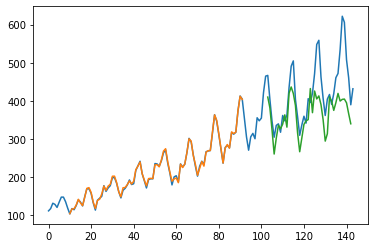

In [35]:
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [36]:
len(test_data)

51

In [37]:
test_data[50]

array([0.63320463])

In [38]:
x_input=test_data[41:].reshape(1,-1)
x_input.shape
x_input

array([[0.60810811, 0.68918919, 0.71042471, 0.83204633, 1.        ,
        0.96911197, 0.77992278, 0.68918919, 0.55212355, 0.63320463]])

Prediction: Probable number of passangers for the next month

In [39]:
x_input=x_input.reshape(1,-1)
x_input = x_input.reshape((1, time_step , 1))

In [45]:
prediction = model.predict(x_input)
print("Probable number of passangers for the next month:" + str(int(scaler.inverse_transform(prediction)[0])))

Probable number of passangers for the next month:435
